In [3]:
import pandas as pd
import os
import sys 
!pip install BeautifulSoup4
!pip install future
import re
import nltk
import past
nltk.download('punkt')
nltk.download("stopwords")  # Download text data sets, including stop words
from nltk.corpus import stopwords # Import the stop word list
print(stopwords.words("french"))
from past.builtins import xrange
import numpy as np
import collections
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront',

[nltk_data] Downloading package punkt to /home/olivier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/olivier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
train = pd.read_csv('gmail_transform_manitra.csv',encoding='utf-8')

In [5]:
#train

In [6]:
def body_to_words(raw_body):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_body) 
    #
    # Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("french"))     
    # 
    # Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join(meaningful_words))

In [7]:
# Get the number of reviews based on the dataframe column size
num_reviews = train["body"].size

# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range(0,num_reviews):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append(body_to_words(str(train["body"][i])))

In [8]:
print("Cleaning and parsing the training set mail body...\n")
clean_train_reviews = []
for i in range(0,num_reviews):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%1000 == 0):
        print("body %d of %d\n" % ( i+1,num_reviews))                                                                   
    clean_train_reviews.append(body_to_words(str(train["body"][i])))

Cleaning and parsing the training set mail body...

body 1000 of 1494



In [9]:
#for body in clean_train_reviews:
#    print(body[0])

# Creating Features from a Bag of Words (Using scikit-learn)

In [10]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word", \
                             tokenizer = None, \
                             preprocessor = None, \
                             stop_words = None, \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [11]:
print(train_data_features.shape)

(1494, 5000)


In [12]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
#print(vocab)

In [13]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
#for tag, count in zip(vocab, dist):
#    print(count, tag)

In [14]:
def word_tokenizer(text):
        #tokenizes and stems the text
        tokens = word_tokenize(text)
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens if t not in stopwords.words('french')]
        return tokens


def cluster_sentences(sentences, nb_of_clusters=5):
        tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenizer,
                                        stop_words=stopwords.words('french'),
                                        max_df=0.9,
                                        min_df=0.1,
                                        lowercase=False)
        #builds a tf-idf matrix for the sentences
        tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
        kmeans = KMeans(n_clusters=nb_of_clusters)
        kmeans.fit(tfidf_matrix)
        clusters = collections.defaultdict(list)
        for i, label in enumerate(kmeans.labels_):
                clusters[label].append(i)
        return dict(clusters)

In [15]:
# MAIN
nclusters= 2
clusters = cluster_sentences(clean_train_reviews, nclusters)

In [16]:
#for cluster in range(nclusters):
#        print("cluster ",cluster,":")
#        for i,sentence in enumerate(clusters[cluster]):
#            print("\tsentence ",i,": ",clean_train_reviews[sentence])

In [17]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(train_data_features)
proba_lists = gmm.predict_proba(train_data_features)

In [19]:
gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Text(0.5,0.92,'Gaussian Mixture Model')

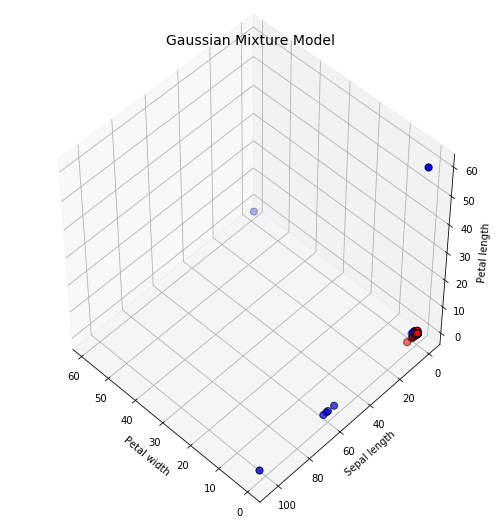

In [20]:
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(train_data_features[:, 3], train_data_features[:, 0], train_data_features[:, 2],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

Text(0.5,0.92,'K Means')

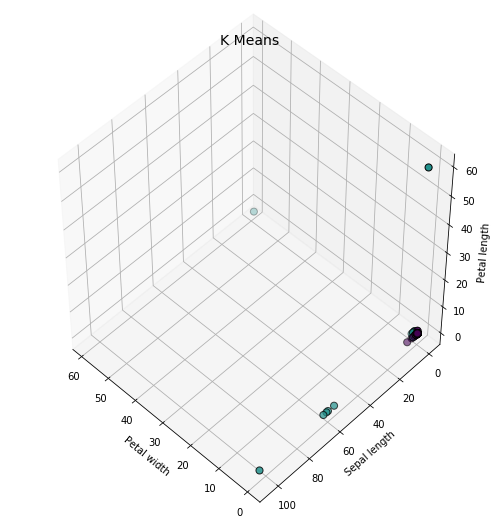

In [21]:
#KMeans
km = KMeans(n_clusters=3)
km.fit(train_data_features)
km.predict(train_data_features)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(train_data_features[:, 3], train_data_features[:, 0], train_data_features[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

In [ ]:
!pip freeze > requirements.txt